# 线性规划

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

# 1. 线性规划的标准形式 

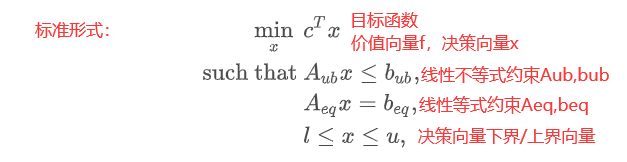

# 2. 代码实现

In [23]:
#scipy.optimize.linprog方法参数

#求解函数
'''
bounds:决策向量上下界(min, max)，用None表示无穷. 
method:进行线性规划的算法
callback:回调
'''
res = optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, 
                       bounds=(0,None), method='interior-point', callback=None, options=None)

In [8]:
#通过例题演示结果结构

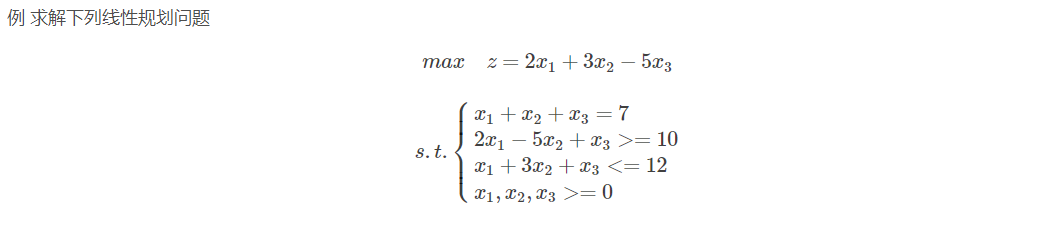

In [13]:
from scipy import optimize
import numpy as np

c = np.array([2, 3, -5])
A_ub = np.array([[-2, 5, 1], [1, 3, 1]])
b_ub = np.array([[-10], [12]])
A_eq = np.array([[1, 1, 1]])#A_eq must be two-dimensional               
b_eq = np.array([7])
bounds = (0, None)

res = optimize.linprog(-c, A_ub, b_ub, A_eq, b_eq, bounds)
res

     fun: -14.571428571428571
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([3.85714286, 0.        ])
  status: 0
 success: True
       x: array([6.42857143, 0.57142857, 0.        ])

In [14]:
#fun就是目标函数最小值（求解最大值时c\fun均添负号），x就是最优解

# 3. 例题一

## 问题提出

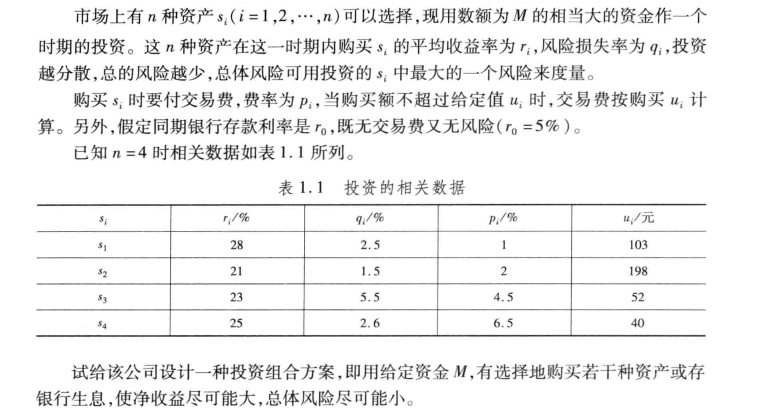

## 符号规定

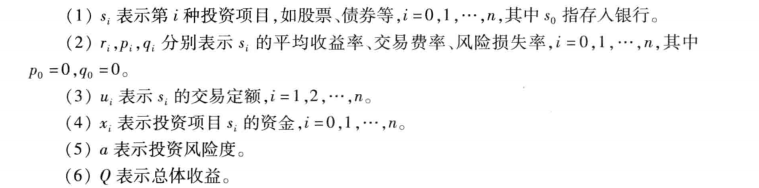

## 基本假设

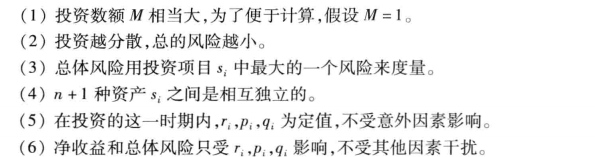

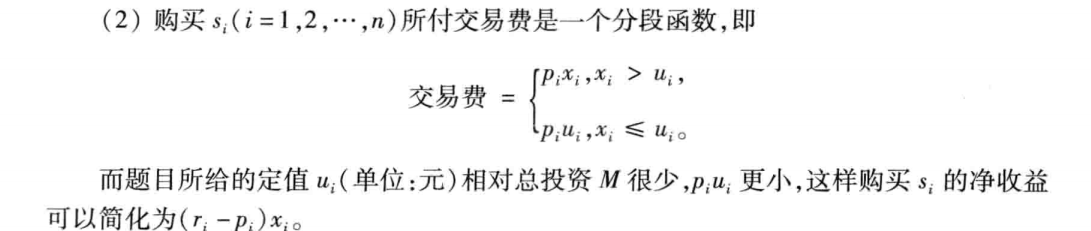

## 模型建立

In [15]:
#多目标模型
#1.使总体风险最小
#2.使总体收益最大

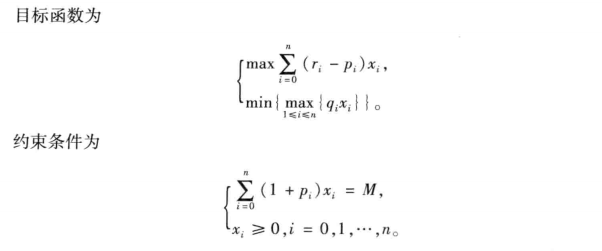

## 多目标模型简化

1.固定风险——设置未知量：最大风险率 使其转化为不等式
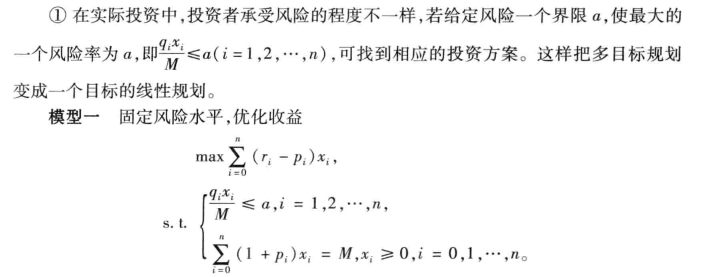

2.固定收益——设置未知量：最小收益 使其转化为不等式
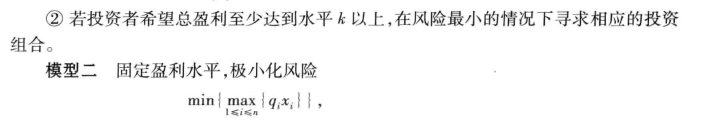

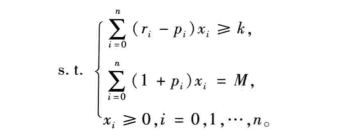

3.给两个目标分配权重
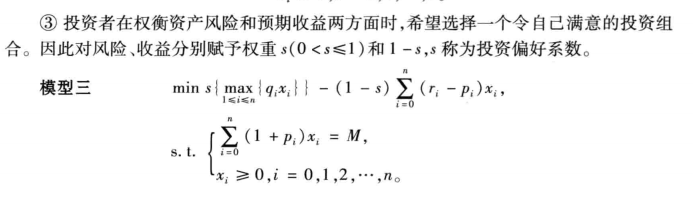

## 代码实现

### 模型一

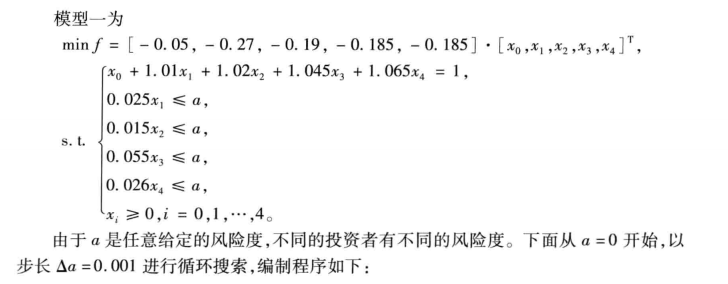

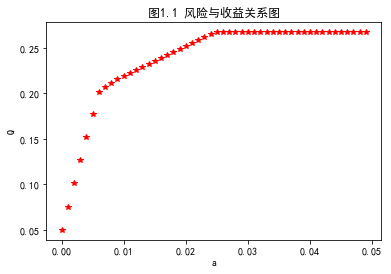

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

a = 0
while a < 0.05:
    c = np.array([0.05, 0.27, 0.19, 0.185, 0.185])
    A_ub = np.diag([0, 0.025, 0.015, 0.055, 0.026])
    B_ub = np.ones(5) * a
    A_eq = np.array([[1, 1.01, 1.02, 1.045, 1.065]])
    B_eq = np.array([1])
    
    res = optimize.linprog(-c, A_ub, B_ub, A_eq, B_eq)
    Q = -res.fun
    a = a
    plt.plot(a, Q, 'r*')
    
    a += 0.001
    
plt.xlabel('a')
plt.ylabel('Q')
plt.title('图1.1 风险与收益关系图')
plt.show()

结果分析

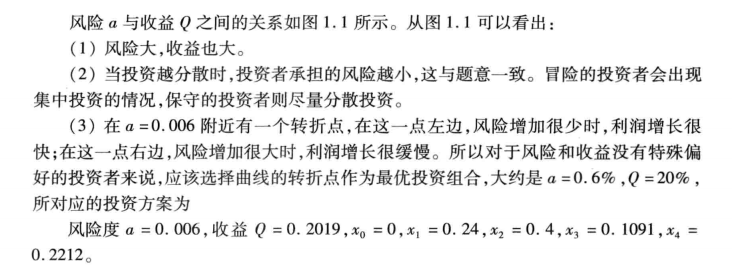

In [6]:
a = 0.006

c = np.array([0.05, 0.27, 0.19, 0.185, 0.185])
A_ub = np.diag([0, 0.025, 0.015, 0.055, 0.026])
B_ub = np.ones(5) * a
A_eq = np.array([[1, 1.01, 1.02, 1.045, 1.065]])
B_eq = np.array([1])

res = optimize.linprog(-c, A_ub, B_ub, A_eq, B_eq)
Q = -res.fun
x = res.x

print('风险度={:.2f}时，收益Q={:.2f}，各投资产品占比: x0={:.2f}, x1={:.2f}, x2={:.2f}, x3={:.2f}, x4={:.2f}。'.format(a, Q, x[0], x[1], x[2], x[3], x[4]))

风险度=0.01时，收益Q=0.20，各投资产品占比: x0=0.00, x1=0.24, x2=0.40, x3=0.11, x4=0.22。


### 模型二

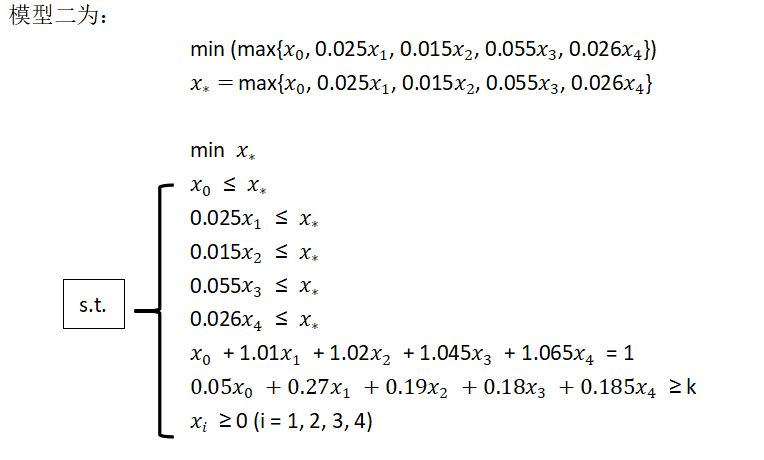

-0.0 [0. 0. 0. 0. 0. 1.]
-0.0 [0. 0. 0. 0. 0. 1.]
-0.0 [0. 0. 0. 0. 0. 1.]
-0.0 [0. 0. 0. 0. 0. 1.]
-0.0 [0. 0. 0. 0. 0. 1.]
-0.0 [0. 0. 0. 0. 0. 1.]
0.016051364365971127 [0.01605136 0.01605136 0.01605136 0.01605136 0.01605136 0.93354735]
0.0321027287319422 [0.03210273 0.03210273 0.03210273 0.03210273 0.03210273 0.8670947 ]
0.04815409309791335 [0.04815409 0.04815409 0.04815409 0.04815409 0.04815409 0.80064205]
0.06420545746388445 [0.06420546 0.06420546 0.06420546 0.06420546 0.06420546 0.73418941]
0.08025682182985552 [0.08025682 0.08025682 0.08025682 0.08025682 0.08025682 0.66773676]
0.09630818619582662 [0.09630819 0.09630819 0.09630819 0.09630819 0.09630819 0.60128411]
0.11235955056179775 [0.11235955 0.11235955 0.11235955 0.11235955 0.11235955 0.53483146]
0.12841091492776885 [0.12841091 0.12841091 0.12841091 0.12841091 0.12841091 0.46837881]
0.1444622792937399 [0.14446228 0.14446228 0.14446228 0.14446228 0.14446228 0.40192616]
0.16051364365971105 [0.16051364 0.16051364 0.16051364 0.160

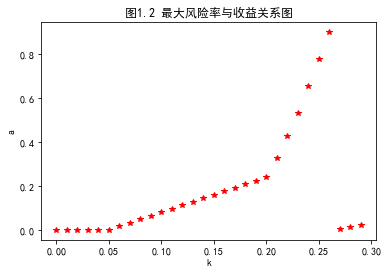

In [20]:
#注：0号位为x*，其后依次为0，1，2，3，4
k = 0
while k < 0.3:
    c = np.array([1,0,0,0,0,0])
    A_ub = np.array([[-1,1,0,0,0,0],[-1,0,1,0,0,0],[-1,0,0,1,0,0],[-1,0,0,0,1,0],[0,-0.27,-0.19,-0.185,-0.185,-0.05]])
    B_ub = np.array([0,0,0,0,-k])
    A_eq = np.array([[0,1.01,1.02,1.045,1.065,1]])
    B_eq = np.array([1])
    
    res = optimize.linprog(c, A_ub, B_ub, A_eq, B_eq)
    a = res.fun
    k = k
    plt.plot(k, a, 'r*')
    print(a, res.x)
    
    k += 0.01
    
plt.xlabel('k')
plt.ylabel('a')
plt.title('图1.2 最大风险率与收益关系图')
plt.show()